In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

In [13]:
data = pd.read_csv("Carseats.csv")

Dasatet information 

* Sales : Target Variable
Unit sales (in thousands) at each location

* CompPrice : 
Price charged by competitor at each location

* Income : 
Community income level (in thousands of dollars)

* Advertising : 
Local advertising budget for company at each location (in thousands of dollars)

* Population : 
Population size in region (in thousands)

* Price : 
Price company charges for car seats at each site

* ShelveLoc : 
A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* Age : 
Average age of the local population

* Education : 
Education level at each location

* Urban : 
A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* US : 
A factor with levels No and Yes to indicate whether the store is in the US or not

In [14]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# 1. EDA

In [15]:
data.info() #no null values in variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [16]:
data.describe() #checking distribution for later analysis and predictive model

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>, <Axes: >]], dtype=object)

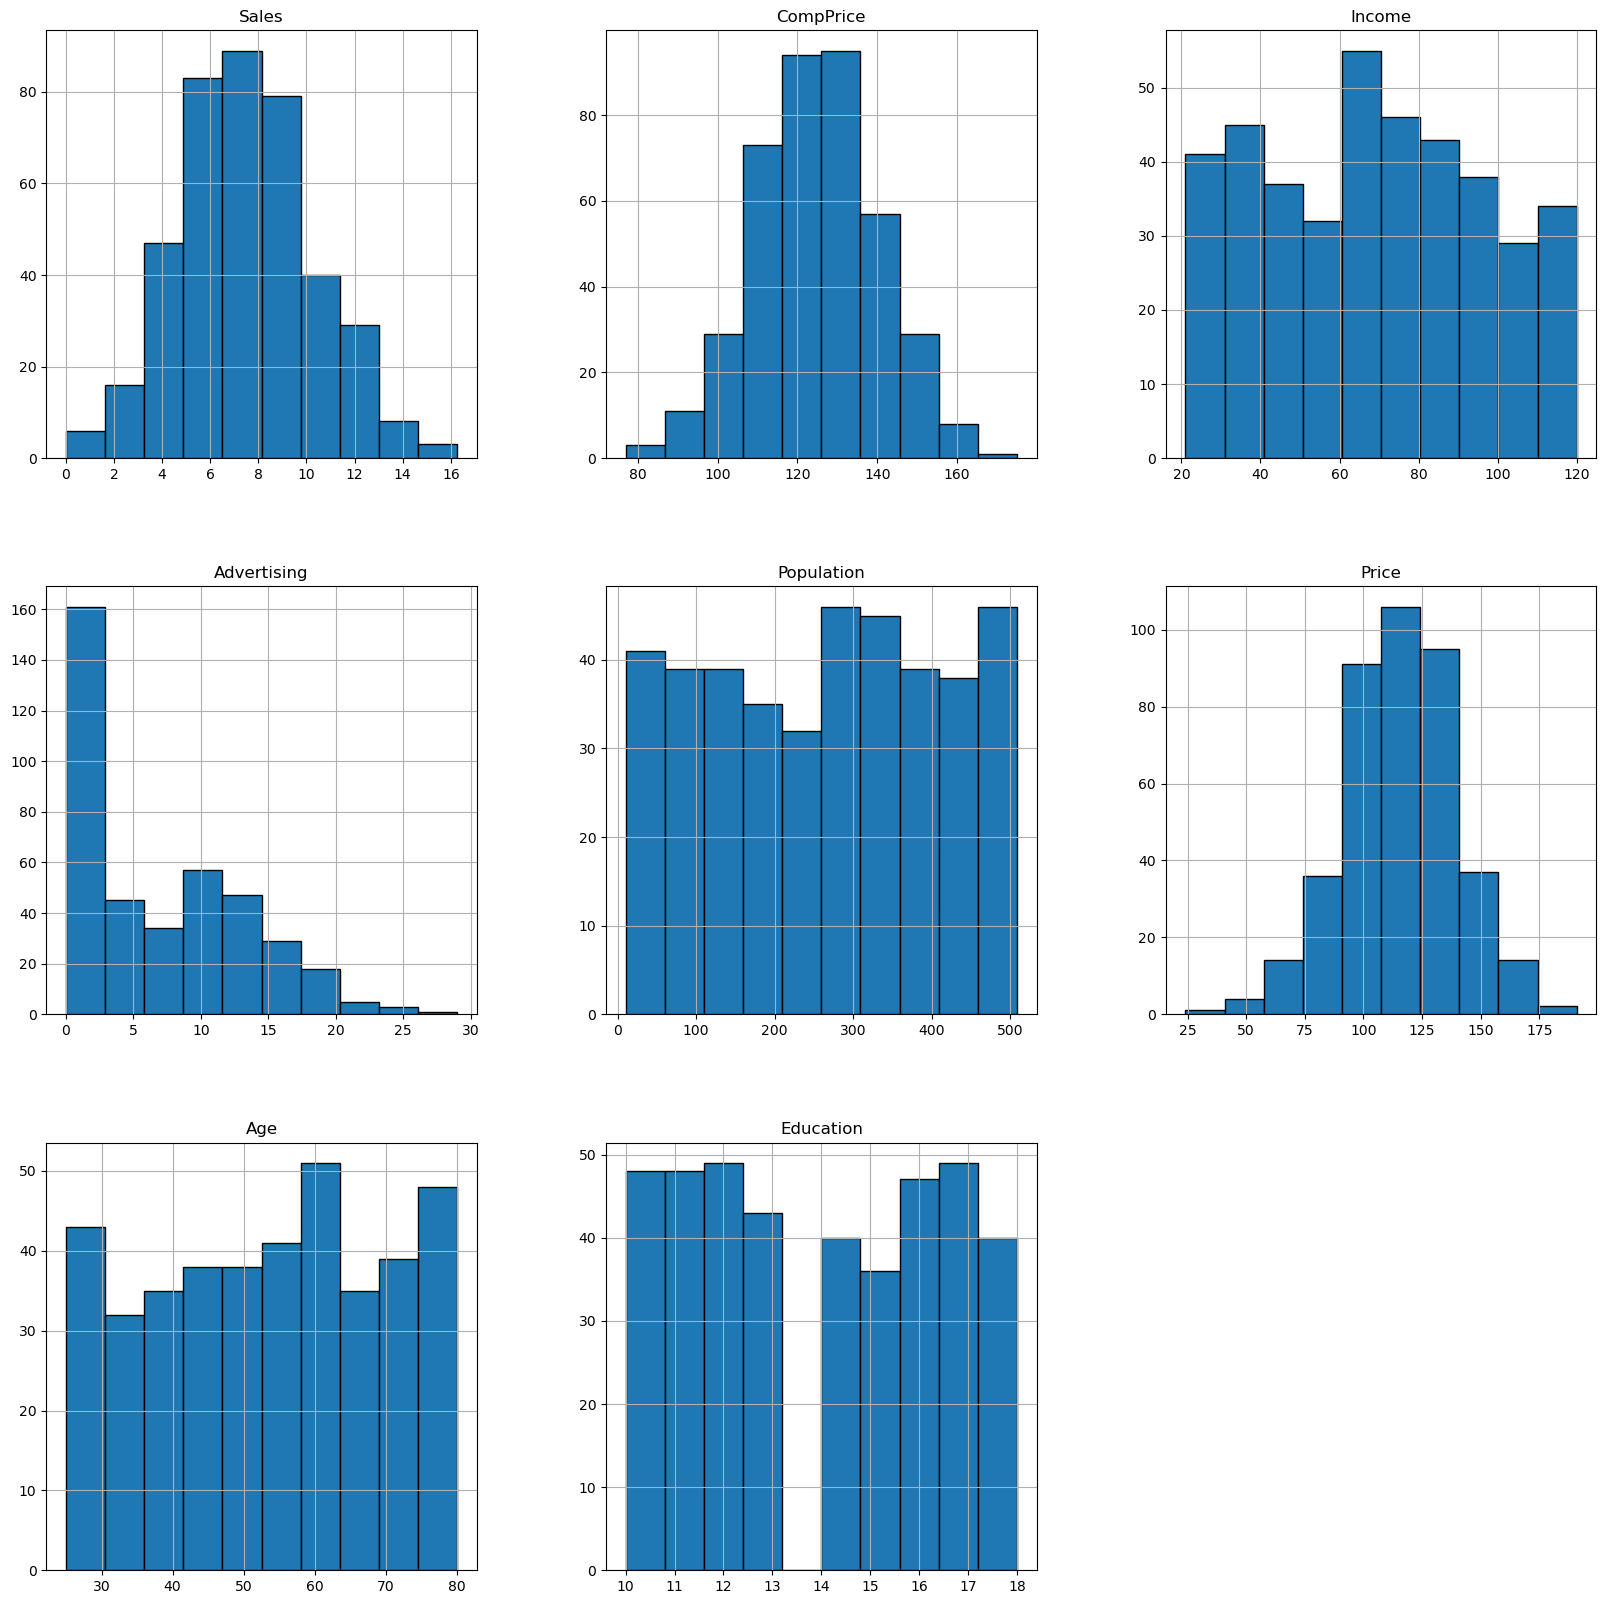

In [17]:
data.hist(edgecolor='black', linewidth=1, figsize=(20, 20)) #viasually the distributions of numeric variables

Most have litte advertising put into them. 

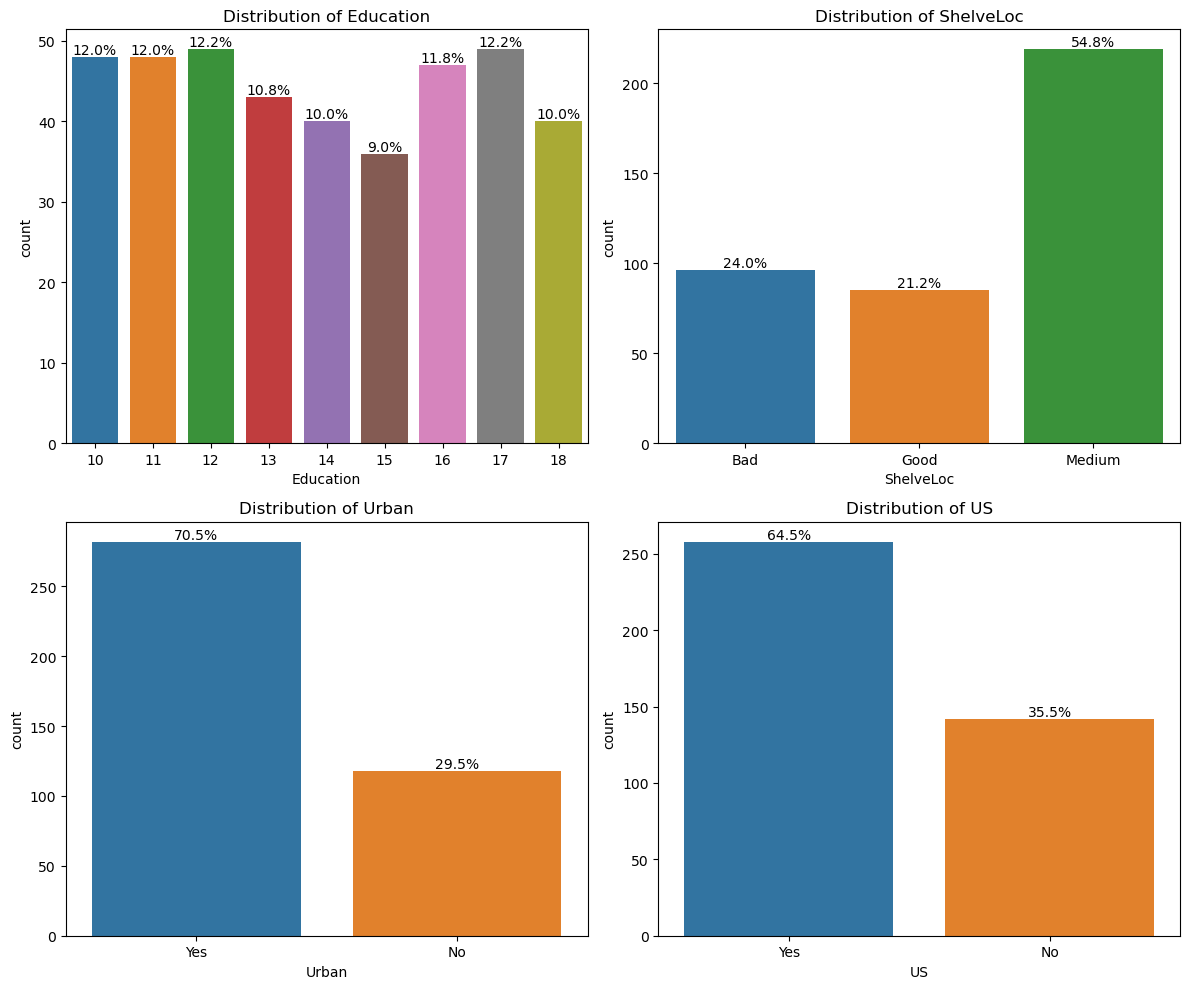

In [98]:
#Now we will analyze categorical variables and see their distribution among groups to analyze potential segmentations
cat_cols = ['Education', 'ShelveLoc', 'Urban', 'US']

plt.figure(figsize=(12, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    
    # Percentage labels on the bars to have apart from count
    total = len(data[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height, f'{height / total * 100:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

We can look at whether we all US stores sales are higher than non, as well as the urban factor affects it.

In [19]:
data.groupby(["US","Urban"])["Sales"].agg(["mean","sum"]) # highest sales on US Urban stores, tho US non Urban have the highest mean, I would like to check if the trend is recent but is not time-series data so we cant analyze that

mean      sum
US  Urban                   
No  No     6.458261   297.08
    Yes    6.997812   671.79
Yes No     8.269722   595.42
    Yes    7.710968  1434.24

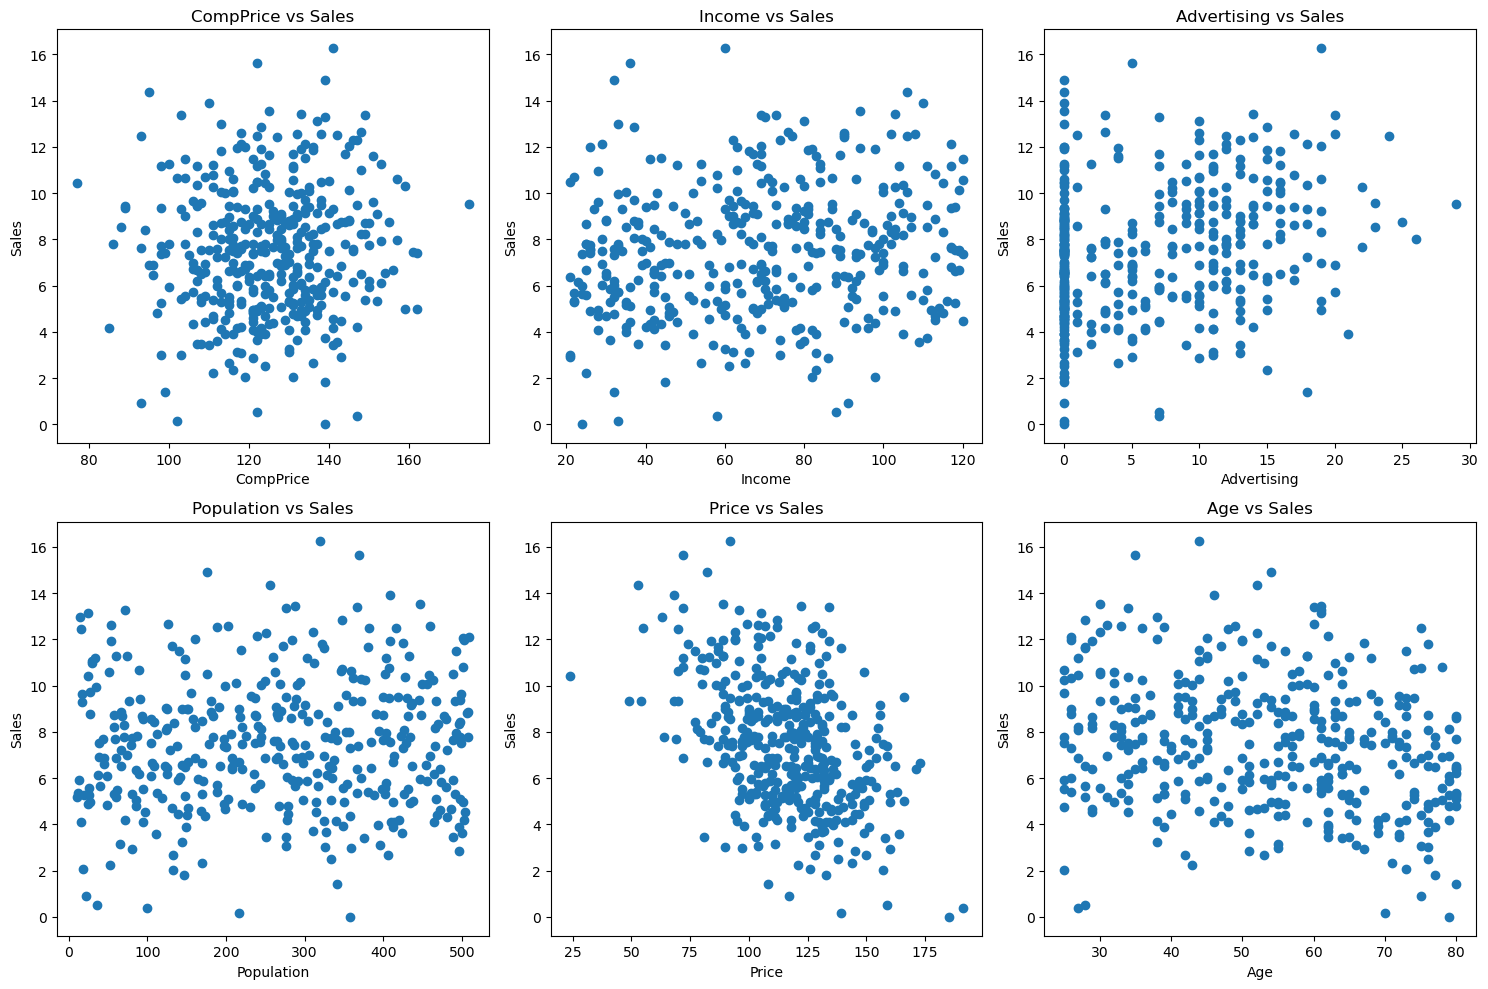

In [20]:
cont_cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Plotting scatter plots
for i, col in enumerate(cont_cols):
    axes[i].scatter(x=col, y='Sales', data=data)
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel('Sales')
    axes[i].set_title(f"{col} vs Sales")

plt.tight_layout()
plt.show()

In [21]:
data['Competitive_Pricing'] = data['Price'] - data['CompPrice']
corr_df = data[['Sales', 'Competitive_Pricing']]
corr_df.corr()

,Sales,Competitive_Pricing
Sales,1.000000,-0.597922
Competitive_Pricing,-0.597922,1.000000


In [22]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Competitive_Pricing
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,-18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,-28
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,-33
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,-20
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,-13
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,-10
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,-19
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,-3
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,-5


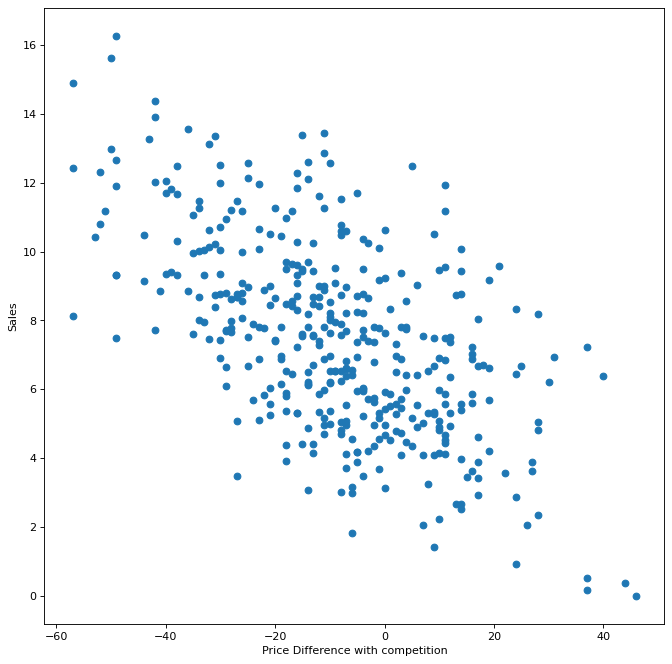

In [23]:
plt.figure(figsize=(10,10), dpi= 80)
plt.scatter(x='Competitive_Pricing', y='Sales', data=data)
plt.xlabel('Price Difference with competition')
plt.ylabel('Sales')
plt.show()

/var/folders/c6/g4rnwdk54nggj6tzn70bc9v80000gn/T/ipykernel_9702/3808430092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


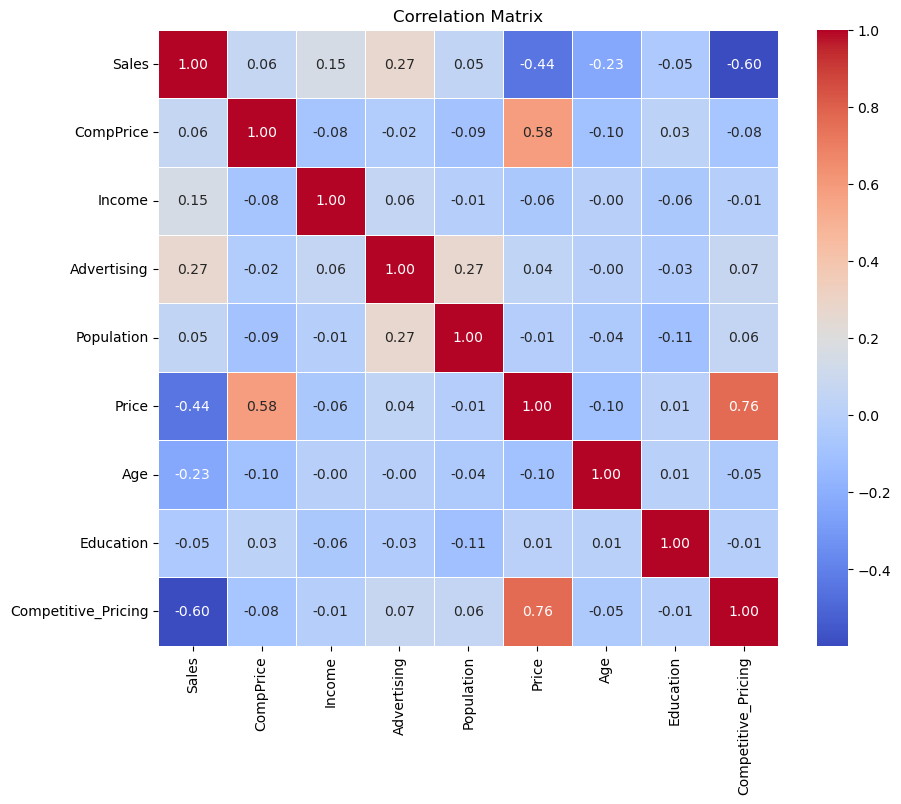

In [63]:
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

In [90]:
# Correlation of each feature with the target variable 'Sales'
target_correlation = correlation_matrix['Sales'].abs().sort_values(ascending=False)
print("\nCorrelation with Sales:")
print(target_correlation)


Correlation with Sales:
Sales                  1.000000
Competitive_Pricing    0.597922
Price                  0.444951
Advertising            0.269507
Age                    0.231815
Income                 0.151951
CompPrice              0.064079
Education              0.051955
Population             0.050471
Name: Sales, dtype: float64


In [91]:
# Features with at least 0.1 correlation
selected_features = target_correlation[target_correlation > 0.1].index
print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['Sales', 'Competitive_Pricing', 'Price', 'Advertising', 'Age',
       'Income'],
      dtype='object')


# 2. Multiple Regression

 Ver influencia cambio 1% en precio / advertising 

In [25]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Competitive_Pricing
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,-18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,-28
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,-33
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,-20
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,-13


In [28]:
# Getting the data ready for regression

X = data.drop('Sales', axis=1)  # Features
y = data['Sales']  # Target variable

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Label encode categorical columns
label_encoder = LabelEncoder()
X_label_encoded = X.copy()
for col in categorical_columns:
    X_label_encoded[col] = label_encoder.fit_transform(X[col])

# Encoded dataframes
print("Label Encoded Data:")
print(X_label_encoded.head())

Label Encoded Data:
   CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  Competitive_Pricing  
0         17      1   1                  -18  
1         10      1   1                  -28  
2         12      1   1                  -33  
3         14      1   1                  -20  
4         13      1   0                  -13  


In [29]:
regr = linear_model.LinearRegression()
regr.fit(X_label_encoded , y)

print(regr.coef_)

[ 3.14733610e-02  1.41489784e-02  1.29408320e-01  2.58441570e-05
 -3.05675282e-02  6.03939059e-01 -4.66504178e-02 -3.91003406e-02
 -8.00397716e-02 -3.54394096e-03 -6.20408892e-02]


In [100]:
chosen_features = ['Advertising', 'Price','Competitive_Pricing']

# Get the indices of the chosen features in the label-encoded dataset
chosen_indices = [X_label_encoded.columns.get_loc(col) for col in chosen_features]

# Get the coefficients for the chosen features
chosen_coefficients = regr.coef_[chosen_indices]

# Create a DataFrame
coefficients_df = pd.DataFrame({'Variable': chosen_features, 'Coefficient': chosen_coefficients})

coefficients_df = coefficients_df.set_index("Variable")
# Print the DataFrame
print(coefficients_df)


Coefficients for chosen features:
[ 0.12940832 -0.03056753 -0.06204089]
                     Coefficient
Variable                        
Advertising             0.129408
Price                  -0.030568
Competitive_Pricing    -0.062041


In [101]:
# Choose the variable to vary (e.g., Competitive_Pricing)
varying_feature = 'Competitive_Pricing'
constant_features = X_label_encoded.columns.difference([varying_feature])

# Set constant values for other features
constant_values = {feature: X_label_encoded[feature].mean() for feature in constant_features}

# Create a range of values for the chosen feature
varying_values = np.linspace(X_label_encoded[varying_feature].min(), X_label_encoded[varying_feature].max(), 100)

# Initialize an array to store predicted sales for each varying value
predicted_sales = []

# Iterate through varying values and predict sales
for value in varying_values:
    constant_values[varying_feature] = value
    input_values = np.array([constant_values[feature] for feature in X_label_encoded.columns])
    predicted_sales.append(np.dot(input_values, regr.coef_) + regr.intercept_)

# Find the index where predicted sales start decreasing
negative_impact_index = np.where(np.diff(predicted_sales) < 0)[0][0]

# Get the corresponding value of Competitive_Pricing
negative_impact_value = varying_values[negative_impact_index]

print(f"The point at which competitive pricing becomes less profitable is at {negative_impact_value} for {varying_feature}")


The point at which competitive pricing becomes less profitable is at -57.0 for Competitive_Pricing


In [52]:
# Choose the variables to vary (e.g., Advertising and Price)
varying_features = ['Advertising', 'Price']
constant_features = X_label_encoded.columns.difference(varying_features)

# Set constant values for other features
constant_values = {feature: X_label_encoded[feature].mean() for feature in constant_features}

# Create a range of values for the chosen features
advertising_values = np.linspace(X_label_encoded['Advertising'].min(), X_label_encoded['Advertising'].max(), 100)
price_values = np.linspace(X_label_encoded['Price'].min(), X_label_encoded['Price'].max(), 100)

advertising_mesh, price_mesh = np.meshgrid(advertising_values, price_values)

# Initialize an array to store predicted sales for each combination of values
predicted_sales = []

# Iterate through combinations of values and predict sales
for advertising, price in zip(advertising_mesh.flatten(), price_mesh.flatten()):
    constant_values['Advertising'] = advertising
    constant_values['Price'] = price
    input_values = np.array([constant_values[feature] for feature in X_label_encoded.columns])
    predicted_sales.append(np.dot(input_values, regr.coef_) + regr.intercept_)

# Reshape the predicted sales array to match the shape of the meshgrid
predicted_sales = np.array(predicted_sales).reshape(advertising_mesh.shape)

# Find the indices where predicted sales start decreasing for both features
negative_impact_indices = np.where(np.diff(predicted_sales, axis=0) < 0)

# Get the corresponding values of Advertising and Price
advertising_negative_impact_values = advertising_values[negative_impact_indices[0]]
price_negative_impact_values = price_values[negative_impact_indices[1]]

print(f"The point at which investing too much in advertising harms sales is at {advertising_negative_impact_values.min()} for Advertising")
print(f"The point at which the price becomes too low to be profitable is at {price_negative_impact_values.min()} for Price")



The point at which investing too much in advertising harms sales is at 0.0 for Advertising
The point at which the price becomes too low to be profitable is at 24.0 for Price


In [53]:
# Your previous code...

# Choose the variable to vary (e.g., Advertising)
varying_feature = 'Advertising'
constant_features = X_label_encoded.columns.difference([varying_feature])

# Set constant values for other features
constant_values = {feature: X_label_encoded[feature].mean() for feature in constant_features}

# Create a range of values for the chosen feature
varying_values = np.linspace(X_label_encoded[varying_feature].min(), X_label_encoded[varying_feature].max(), 100)

# Initialize an array to store predicted sales for each varying value
predicted_sales = []

# Iterate through varying values and predict sales
for value in varying_values:
    constant_values[varying_feature] = value
    input_values = np.array([constant_values[feature] for feature in X_label_encoded.columns])
    predicted_sales.append(np.dot(input_values, regr.coef_) + regr.intercept_)

# Find the index where predicted sales peak
peak_index = np.argmax(predicted_sales)

# Get the corresponding value of Advertising at the peak
peak_value = varying_values[peak_index]

print(f"The point at which investing too much in advertising starts to have diminishing returns or peaks is at {peak_value} for {varying_feature}")


The point at which investing too much in advertising starts to have diminishing returns or peaks is at 29.0 for Advertising


In [61]:
# Find the index where predicted sales start decreasing
decreasing_indices = np.where(np.diff(predicted_sales) < 0)[0]

# Check if there are indices before accessing the first one
if len(decreasing_indices) > 0:
    # Get the index of the maximum predicted sales before the decrease
    max_before_decrease_index = decreasing_indices[decreasing_indices > 0][0]
    max_before_decrease_value = varying_values[max_before_decrease_index]

    # Plotting
    fig, ax = plt.subplots()
    ax.scatter(X_label_encoded[varying_feature], y, label='Actual Sales', alpha=0.7)
    ax.plot(varying_values, predicted_sales, label='Predicted Sales')

    # Highlight the point where the impact of advertising on predicted sales starts to diminish
    ax.scatter(max_before_decrease_value, np.max(predicted_sales), color='orange', label='Optimal Point')

    # Add labels and title
    ax.set_xlabel(varying_feature)
    ax.set_ylabel('Sales')
    ax.set_title(f'Relationship between {varying_feature} and Sales')

    # Show legend
    ax.legend()

    plt.show()
else:
    print("No point found where the impact of advertising on predicted sales starts to diminish.")


No point found where the impact of advertising on predicted sales starts to diminish.


# 3. Decision Tree

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_label_encoded, y, test_size=0.3, random_state=42)

print('Train features shape: {}'.format(X_train.shape))
print('Train labels shape: {}'.format(y_train.shape))
print('Test features shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Train features shape: (280, 11)
Train labels shape: (280,)
Test features shape: (120, 11)
Test labels shape: (120,)


In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg_dt= DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=2, max_depth=3, random_state=42)
reg_dt.fit(X_train, y_train)

pred = reg_dt.predict(X_test)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

print(f"MSE : {MSE}, RMSE : {RMSE}")

MSE : 3.4257895554100934, RMSE : 1.8508888554989178


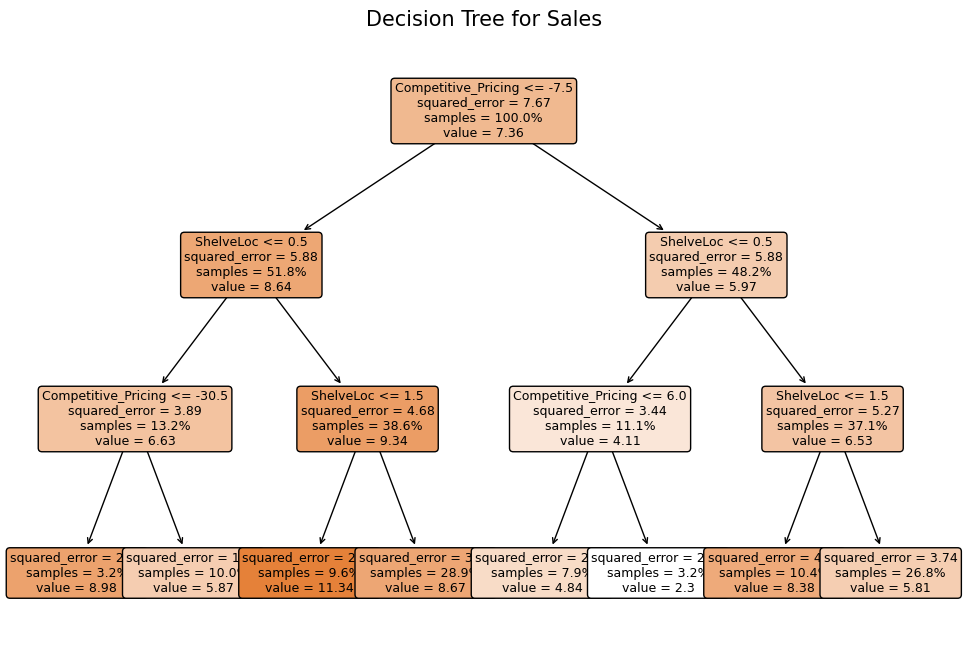

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_decision_tree(regressor, feature_names, target_name):
    plt.figure(figsize=(12, 8))
    plot_tree(regressor, filled=True, feature_names=feature_names, rounded=True, proportion=True, precision=2, fontsize=9)
    plt.title(f'Decision Tree for {target_name}', fontsize=15)
    plt.show()

# Assuming X_train.columns contains the feature names
plot_decision_tree(reg_dt, X_train.columns, 'Sales')
